<a href="https://colab.research.google.com/github/river6907/Bigdata-Analysis/blob/main/%EC%8B%A4%EC%8A%B512_ModelEvaluation_%EA%B0%95%EB%8F%99%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습12. 분류 성능 확인 연습

## 1) iris dataset의 3-NN, logistic regression 분류결과에 대한 ROC 그래프와 AUC값 확인


['setosa' 'versicolor' 'virginica']
Confusion matrix
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


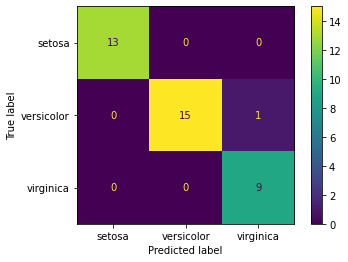

In [23]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
print(class_names)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run  LogisticRegression classifier
classifier = LogisticRegression()
y_pred = classifier.fit(X_train, y_train).predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix')
print(cm)
cm_display = ConfusionMatrixDisplay(cm, display_labels = class_names).plot()

**Receiver operating characteristic (ROC)**

* 이진 분류에서 판별 기준 값(threshold)의 변화에 따른 성능을 보여주는 그래프 
* 다양한 분류 임계 값에서의 true positive rate(TPR, sensitivity, recall )과 false positive rate(FPR, 1- specificity)을 시각화

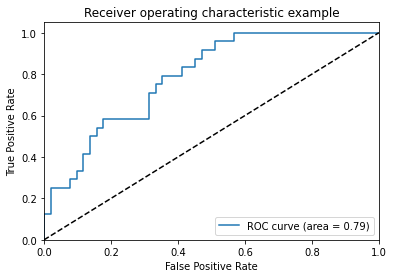

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**AUC (Area Under the Curve)**
* ROC curve의 면적
* FPR 대비 TPR 값이 클 수록 AUC가 1에 가까운 값으로 민감도가 높은 성능이 좋은 모델

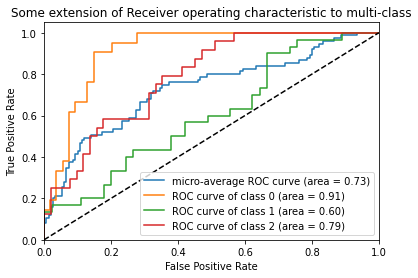

In [27]:
# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# 2) Breast cancer data set 을 이용한 5-fold Cross Validation의 평균시간과 분류 점수 확인 (logistic regression 분류방법 이용)


In [32]:
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
logreg = LogisticRegression()
#cross_val_score, 교차검증 점수 
#K = 5, default
scores = cross_val_score(logreg, X, y, cv=5)
print("5-fold 교차 검증 점수:", scores)
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

#k  입력
scores = cross_val_score(logreg, X, y, cv=3)
print("3-fold 교차 검증 점수:", scores)
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

# cross_validate, 교차검증으로 train, test 의 score, time 반환
res = cross_validate(logreg, cancer.data, cancer.target, cv=5,
                     return_train_score=True)
display(res)

res_df = pd.DataFrame(res)
display(res_df)
print("평균 시간과 점수:\n", res_df.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


5-fold 교차 검증 점수: [0.92982456 0.93859649 0.96491228 0.93859649 0.95575221]
교차 검증 평균 점수: 0.95
3-fold 교차 검증 점수: [0.93157895 0.96842105 0.93121693]
교차 검증 평균 점수: 0.94


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'fit_time': array([0.03917456, 0.02724791, 0.0307982 , 0.03138447, 0.02878141]),
 'score_time': array([0.00111866, 0.00036907, 0.00131845, 0.00038147, 0.00037527]),
 'test_score': array([0.92982456, 0.93859649, 0.96491228, 0.93859649, 0.95575221]),
 'train_score': array([0.96043956, 0.93626374, 0.94505495, 0.95604396, 0.9495614 ])}

,fit_time,score_time,test_score,train_score
0,0.039175,0.001119,0.929825,0.960440
1,0.027248,0.000369,0.938596,0.936264
2,0.030798,0.001318,0.964912,0.945055
3,0.031384,0.000381,0.938596,0.956044
4,0.028781,0.000375,0.955752,0.949561


평균 시간과 점수:
 fit_time       0.031477
score_time     0.000713
test_score     0.945536
train_score    0.949473
dtype: float64
